In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier, XGBRegressor
import warnings

In [2]:
from sklearn.exceptions import UndefinedMetricWarning
warnings.filterwarnings("ignore", category=UndefinedMetricWarning)

def print_regression_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print('Mean absolute error:', mean_absolute_error(y_val, y_pred))
    print('Mean squared error:', mean_squared_error(y_val, y_pred))
    print('Root Mean squared error:', np.sqrt(mean_squared_error(y_val, y_pred)))

def print_classification_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

def print_multilabel_classification_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
2           3  Bobby Jindal, raised Hindu, uses story of Chri...   
3           4  SATAN 2: Russia unvelis an image of its terrif...   
4           5  About Time! Christian Group Sues Amazon and SP...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1   Now, most of the demonstrators gathered last ...      1  
2  A dozen politically active pastors came here f...      0  
3  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  
4  All we can say on this one is it s about time ...      1  


<Axes: >

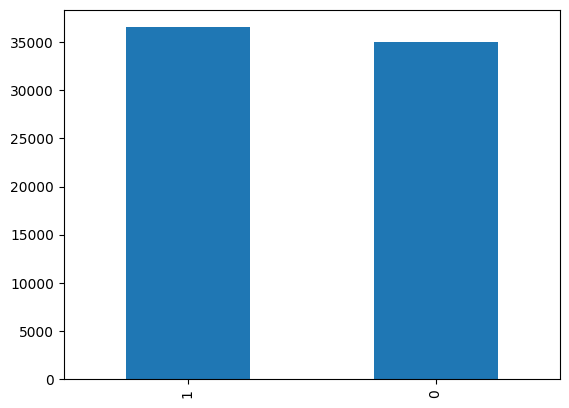

In [4]:
data = pd.read_csv('datasets/fake_news/data.csv')
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
print(data.head())

rating_counts = data['label'].value_counts()
rating_counts.plot(kind='bar')

In [8]:
X, y = data['title'] + ' ' + data['text'], data['label']

NUM_FOLDS = 5
MAX_FEATURES = 5000
N_GRAMS = 2

vectorizer = TfidfVectorizer(max_features=MAX_FEATURES, ngram_range=(1, N_GRAMS), lowercase=False)
label_encoder = LabelEncoder()
X = vectorizer.fit_transform(X)
y = label_encoder.fit_transform(y)

fold = 1

for train_index, val_index in KFold(NUM_FOLDS).split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = XGBClassifier(n_jobs=-1, random_state=42, max_depth=4, n_estimators=500, learning_rate=0.3, colsample_bytree=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print_classification_report(y_val, y_pred, fold)
    fold += 1


Fold: 1
Accuracy Score: 0.9834358400894604
Confusion Matrix: 
 [[6697  154]
 [  83 7374]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      6851
           1       0.98      0.99      0.98      7457

    accuracy                           0.98     14308
   macro avg       0.98      0.98      0.98     14308
weighted avg       0.98      0.98      0.98     14308

Fold: 2
Accuracy Score: 0.9811993290466872
Confusion Matrix: 
 [[6868  169]
 [ 100 7171]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      7037
           1       0.98      0.99      0.98      7271

    accuracy                           0.98     14308
   macro avg       0.98      0.98      0.98     14308
weighted avg       0.98      0.98      0.98     14308

Fold: 3
Accuracy Score: 0.980848535681834
Confusion Matrix: 
 [[6887  168]
 [ 106 7146]]
Classification Report: 
   